In [59]:
# Imports

import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import spacy

from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter


In [4]:
# Downloads


# Agenda

I. Text Preprocessing

1. Loading the raw text
2. Converting text to lowercase
3. Removing special characters, numbers, and punctuation
4. Tokenization (splitting text into words or sentences)
5. Stopword removal
6. Stemming
7. Lemmatization
- with NLTK
- with Spacy

II. Text analysis

8. Word Frequency Distribution
9. Bi- and Trigram Creation
10. N-Grams Frequency Analysis
11. Removing rare or overly N-Grams
12. Visualizations


#### 1. Loading the raw text

In [12]:
# Loading the text file and printing part of it

with open("Bulgaria.txt", "r", encoding = "utf-8") as file:
    text = file.read()

print(text[500:1000])

и силата
Sŭedinenieto pravi silata
("Unity makes strength")
Anthem: Мила Родино
"Mila Rodino"
("Dear Motherland")
Duration: 1 minute and 27 seconds.1:27
Location of Bulgaria (dark green) – in Europe (green & dark grey) – in the European Union (green)  –  [Legend]
Location of Bulgaria (dark green)
– in Europe (green & dark grey)
– in the European Union (green)  –  [Legend]

Capital
and largest city
Sofia
42°41′51″N 23°19′21″E
Official languages	Bulgarian[1]
Official script	Cyrillic
Ethnic groups 


#### 2.Converting text to lowercase

In [11]:
# Lowercasing the text

text_lowercase = text.lower()
print(text_lowercase[500:1000])

и силата
sŭedinenieto pravi silata
("unity makes strength")
anthem: мила родино
"mila rodino"
("dear motherland")
duration: 1 minute and 27 seconds.1:27
location of bulgaria (dark green) – in europe (green & dark grey) – in the european union (green)  –  [legend]
location of bulgaria (dark green)
– in europe (green & dark grey)
– in the european union (green)  –  [legend]

capital
and largest city
sofia
42°41′51″n 23°19′21″e
official languages	bulgarian[1]
official script	cyrillic
ethnic groups 


#### 3. Removing special characters, numbers, and punctuation


In [16]:
#Removing any special characters and numbers

text_cleaned = re.sub(r"[^a-zA-Z\s]", "",text_lowercase)
print(text_cleaned[500:1000])

odino
dear motherland
duration  minute and  seconds
location of bulgaria dark green  in europe green  dark grey  in the european union green    legend
location of bulgaria dark green
 in europe green  dark grey
 in the european union green    legend

capital
and largest city
sofia
n e
official languages	bulgarian
official script	cyrillic
ethnic groups  census	
 bulgarians
 turks
 roma
 othernote 
religion  census	
 christianity
 bulgarian orthodoxy
 other christian
 no religion
 islam
 other
 un


#### 5. Tokenization (splitting text into words or sentences)

In [19]:
# Word Tokenization

words = nltk.word_tokenize(text_cleaned)
print(words[:50])

['bulgaria', 'article', 'talk', 'read', 'view', 'source', 'view', 'history', 'tools', 'appearance', 'hide', 'text', 'small', 'standard', 'large', 'width', 'standard', 'wide', 'color', 'beta', 'automatic', 'light', 'dark', 'coordinates', 'n', 'e', 'featured', 'article', 'page', 'semiprotected', 'from', 'wikipedia', 'the', 'free', 'encyclopedia', 'this', 'article', 'is', 'about', 'the', 'country', 'for', 'other', 'uses', 'see', 'bulgaria', 'disambiguation', 'republic', 'of', 'bulgaria']


In [30]:
# Sentence Tokenization

sentences = nltk.sent_tokenize(text_cleaned)
for sent in sentences:
    print(sent)

bulgaria

article
talk
read
view source
view history

tools
appearance hide
text

small

standard

large
width

standard

wide
color beta

automatic

light

dark
coordinates n e
featured article
page semiprotected
from wikipedia the free encyclopedia
this article is about the country for other uses see bulgaria disambiguation
republic of bulgaria
 
republika blgariya
flag of bulgaria
flag
coat of arms of bulgaria
coat of arms
motto   
sedinenieto pravi silata
unity makes strength
anthem  
mila rodino
dear motherland
duration  minute and  seconds
location of bulgaria dark green  in europe green  dark grey  in the european union green    legend
location of bulgaria dark green
 in europe green  dark grey
 in the european union green    legend

capital
and largest city
sofia
n e
official languages	bulgarian
official script	cyrillic
ethnic groups  census	
 bulgarians
 turks
 roma
 othernote 
religion  census	
 christianity
 bulgarian orthodoxy
 other christian
 no religion
 islam
 other
 un

#### 4. Stopword removal


In [32]:
# Initialize the stopwords

stop_words = set(stopwords.words("english"))
print(stop_words)

{'be', 'through', 'my', "don't", 'too', "aren't", 'again', 'her', 'ma', "couldn't", 'will', 'over', 'had', 'below', 'these', 'yourselves', "you're", 'doesn', "you've", 'are', 'then', 'those', 'when', 'than', 'shan', 'more', 'was', 'herself', 'to', 'aren', 'where', 'very', 'some', 'own', 'as', "needn't", 'no', 'few', "mightn't", "that'll", 'that', 'such', 'being', 've', 'only', 's', 'for', 'during', 'itself', 'couldn', 'this', 'were', 'been', "wouldn't", 'against', 'between', 'don', 'our', 'them', 'd', 'ain', 'and', 'same', 'at', 'themselves', 'other', 'before', "hasn't", "doesn't", 'wasn', 'both', "didn't", 'hasn', "should've", "won't", 'doing', 'in', 'isn', 'ourselves', "you'd", 't', 'won', 'down', 'an', 'until', 'after', 'weren', 'hers', 'out', 'theirs', "mustn't", "shan't", 'if', 'can', 'into', 'did', 'their', "she's", 'it', 'most', 'about', 'wouldn', 'so', "hadn't", 'on', 'yourself', 'am', 'll', 'further', 'mightn', 'while', 'me', "you'll", 'the', 'how', 'just', 'm', 'any', 'from',

In [36]:
# Removing the stopwords

filtered_words = [word for word in words if word not in stop_words]
print(filtered_words[:50])

['bulgaria', 'article', 'talk', 'read', 'view', 'source', 'view', 'history', 'tools', 'appearance', 'hide', 'text', 'small', 'standard', 'large', 'width', 'standard', 'wide', 'color', 'beta', 'automatic', 'light', 'dark', 'coordinates', 'n', 'e', 'featured', 'article', 'page', 'semiprotected', 'wikipedia', 'free', 'encyclopedia', 'article', 'country', 'uses', 'see', 'bulgaria', 'disambiguation', 'republic', 'bulgaria', 'republika', 'blgariya', 'flag', 'bulgaria', 'flag', 'coat', 'arms', 'bulgaria', 'coat']


#### 6. Stemming

In [39]:
# Initialize the Stemmer

stemmer = PorterStemmer()

In [42]:
# Stemming the words

stemmed_words = [stemmer.stem(word) for word in filtered_words]
print(stemmed_words[:100])

['bulgaria', 'articl', 'talk', 'read', 'view', 'sourc', 'view', 'histori', 'tool', 'appear', 'hide', 'text', 'small', 'standard', 'larg', 'width', 'standard', 'wide', 'color', 'beta', 'automat', 'light', 'dark', 'coordin', 'n', 'e', 'featur', 'articl', 'page', 'semiprotect', 'wikipedia', 'free', 'encyclopedia', 'articl', 'countri', 'use', 'see', 'bulgaria', 'disambigu', 'republ', 'bulgaria', 'republika', 'blgariya', 'flag', 'bulgaria', 'flag', 'coat', 'arm', 'bulgaria', 'coat', 'arm', 'motto', 'sedinenieto', 'pravi', 'silata', 'uniti', 'make', 'strength', 'anthem', 'mila', 'rodino', 'dear', 'motherland', 'durat', 'minut', 'second', 'locat', 'bulgaria', 'dark', 'green', 'europ', 'green', 'dark', 'grey', 'european', 'union', 'green', 'legend', 'locat', 'bulgaria', 'dark', 'green', 'europ', 'green', 'dark', 'grey', 'european', 'union', 'green', 'legend', 'capit', 'largest', 'citi', 'sofia', 'n', 'e', 'offici', 'languag', 'bulgarian', 'offici']


#### 7. Lemmatization

##### with NLTK

In [44]:
# Initialize the Lemmatizer

lemmatizer = WordNetLemmatizer()

In [48]:
# Lemmatizing the words

lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print(lemmatized_words[:100])

['bulgaria', 'article', 'talk', 'read', 'view', 'source', 'view', 'history', 'tool', 'appearance', 'hide', 'text', 'small', 'standard', 'large', 'width', 'standard', 'wide', 'color', 'beta', 'automatic', 'light', 'dark', 'coordinate', 'n', 'e', 'featured', 'article', 'page', 'semiprotected', 'wikipedia', 'free', 'encyclopedia', 'article', 'country', 'us', 'see', 'bulgaria', 'disambiguation', 'republic', 'bulgaria', 'republika', 'blgariya', 'flag', 'bulgaria', 'flag', 'coat', 'arm', 'bulgaria', 'coat', 'arm', 'motto', 'sedinenieto', 'pravi', 'silata', 'unity', 'make', 'strength', 'anthem', 'mila', 'rodino', 'dear', 'motherland', 'duration', 'minute', 'second', 'location', 'bulgaria', 'dark', 'green', 'europe', 'green', 'dark', 'grey', 'european', 'union', 'green', 'legend', 'location', 'bulgaria', 'dark', 'green', 'europe', 'green', 'dark', 'grey', 'european', 'union', 'green', 'legend', 'capital', 'largest', 'city', 'sofia', 'n', 'e', 'official', 'language', 'bulgarian', 'official']


##### with Spacy

In [50]:
# Initialize the model and load the text

nlp = spacy.load("en_core_web_sm")
document = nlp(text_cleaned)

In [52]:
lemmatized_words_spacy = [token.text for token in document if token.text not in stop_words and token.is_alpha]
print(lemmatized_words_spacy[:100])

['bulgaria', 'article', 'talk', 'read', 'view', 'source', 'view', 'history', 'tools', 'appearance', 'hide', 'text', 'small', 'standard', 'large', 'width', 'standard', 'wide', 'color', 'beta', 'automatic', 'light', 'dark', 'coordinates', 'n', 'e', 'featured', 'article', 'page', 'semiprotected', 'wikipedia', 'free', 'encyclopedia', 'article', 'country', 'uses', 'see', 'bulgaria', 'disambiguation', 'republic', 'bulgaria', 'republika', 'blgariya', 'flag', 'bulgaria', 'flag', 'coat', 'arms', 'bulgaria', 'coat', 'arms', 'motto', 'sedinenieto', 'pravi', 'silata', 'unity', 'makes', 'strength', 'anthem', 'mila', 'rodino', 'dear', 'motherland', 'duration', 'minute', 'seconds', 'location', 'bulgaria', 'dark', 'green', 'europe', 'green', 'dark', 'grey', 'european', 'union', 'green', 'legend', 'location', 'bulgaria', 'dark', 'green', 'europe', 'green', 'dark', 'grey', 'european', 'union', 'green', 'legend', 'capital', 'largest', 'city', 'sofia', 'n', 'e', 'official', 'languages', 'bulgarian', 'offi

### II. Text analysis

#### 8. Word Frequency Distribution


In [74]:
# Counting the words frequency and printing the top 20 most common

word_counts = Counter(lemmatized_words_spacy)
common_words = word_counts.most_common(20)
common_words

[('bulgaria', 126),
 ('bulgarian', 83),
 ('national', 41),
 ('th', 35),
 ('empire', 30),
 ('european', 26),
 ('country', 24),
 ('government', 24),
 ('main', 24),
 ('first', 22),
 ('article', 21),
 ('state', 21),
 ('war', 21),
 ('europe', 20),
 ('sofia', 20),
 ('since', 20),
 ('century', 18),
 ('population', 17),
 ('world', 17),
 ('also', 17)]

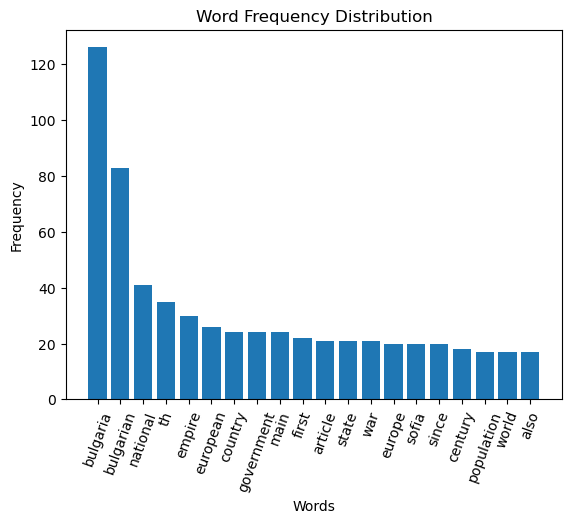

In [80]:
# Visualize the result

plt.bar(*zip(*common_words))

plt.xticks(rotation=70)
plt.title("Word Frequency Distribution")
plt.xlabel("Words")
plt.ylabel("Frequency")

plt.show()

#### 9. Bi- and Trigram Creation


In [57]:
# N-Grams Creation

bigrams = list(ngrams(lemmatized_words_spacy, 2))
trigrams = list(ngrams(lemmatized_words_spacy, 3))

In [60]:
print(bigrams[:20])

[('bulgaria', 'article'), ('article', 'talk'), ('talk', 'read'), ('read', 'view'), ('view', 'source'), ('source', 'view'), ('view', 'history'), ('history', 'tools'), ('tools', 'appearance'), ('appearance', 'hide'), ('hide', 'text'), ('text', 'small'), ('small', 'standard'), ('standard', 'large'), ('large', 'width'), ('width', 'standard'), ('standard', 'wide'), ('wide', 'color'), ('color', 'beta'), ('beta', 'automatic')]


In [61]:
print(trigrams[:20])

[('bulgaria', 'article', 'talk'), ('article', 'talk', 'read'), ('talk', 'read', 'view'), ('read', 'view', 'source'), ('view', 'source', 'view'), ('source', 'view', 'history'), ('view', 'history', 'tools'), ('history', 'tools', 'appearance'), ('tools', 'appearance', 'hide'), ('appearance', 'hide', 'text'), ('hide', 'text', 'small'), ('text', 'small', 'standard'), ('small', 'standard', 'large'), ('standard', 'large', 'width'), ('large', 'width', 'standard'), ('width', 'standard', 'wide'), ('standard', 'wide', 'color'), ('wide', 'color', 'beta'), ('color', 'beta', 'automatic'), ('beta', 'automatic', 'light')]


#### 10. N-Grams Frequency Analysis


In [68]:
most_common_bigrams = Counter(bigrams).most_common(20)
most_common_bigrams

[(('main', 'article'), 17),
 (('bulgarian', 'empire'), 16),
 (('th', 'century'), 14),
 (('european', 'union'), 12),
 (('first', 'bulgarian'), 9),
 (('prime', 'minister'), 8),
 (('national', 'assembly'), 6),
 (('per', 'capita'), 6),
 (('second', 'bulgarian'), 6),
 (('kilometres', 'mi'), 6),
 (('black', 'sea'), 5),
 (('bulgarian', 'state'), 5),
 (('balkan', 'mountains'), 5),
 (('eastern', 'orthodox'), 5),
 (('veliko', 'tarnovo'), 5),
 (('armed', 'forces'), 5),
 (('sq', 'mi'), 4),
 (('ivan', 'asen'), 4),
 (('communist', 'party'), 4),
 (('history', 'bulgaria'), 4)]

In [67]:
most_common_trigrams = Counter(trigrams).most_common(20)
most_common_trigrams

[(('first', 'bulgarian', 'empire'), 7),
 (('second', 'bulgarian', 'empire'), 6),
 (('treaty', 'san', 'stefano'), 3),
 (('tsar', 'boris', 'iii'), 3),
 (('length', 'kilometres', 'mi'), 3),
 (('continental', 'air', 'masses'), 3),
 (('coordinates', 'n', 'e'), 2),
 (('location', 'bulgaria', 'dark'), 2),
 (('bulgaria', 'dark', 'green'), 2),
 (('dark', 'green', 'europe'), 2),
 (('green', 'europe', 'green'), 2),
 (('europe', 'green', 'dark'), 2),
 (('green', 'dark', 'grey'), 2),
 (('dark', 'grey', 'european'), 2),
 (('grey', 'european', 'union'), 2),
 (('european', 'union', 'green'), 2),
 (('union', 'green', 'legend'), 2),
 (('capital', 'largest', 'city'), 2),
 (('unitary', 'parliamentary', 'republic'), 2),
 (('president', 'rumen', 'radev'), 2)]

#### 11. Removing rare or overly N-Grams

In [98]:
filtered_bigrams = {key: value for key,value in Counter(bigrams).items() if 4<=value}
sorted_filtered_bigrams = sorted(filtered_bigrams.items(), key = lambda x:x[1], reverse=True)
sorted_filtered_bigrams

[(('main', 'article'), 17),
 (('bulgarian', 'empire'), 16),
 (('th', 'century'), 14),
 (('european', 'union'), 12),
 (('first', 'bulgarian'), 9),
 (('prime', 'minister'), 8),
 (('national', 'assembly'), 6),
 (('per', 'capita'), 6),
 (('second', 'bulgarian'), 6),
 (('kilometres', 'mi'), 6),
 (('black', 'sea'), 5),
 (('bulgarian', 'state'), 5),
 (('balkan', 'mountains'), 5),
 (('eastern', 'orthodox'), 5),
 (('veliko', 'tarnovo'), 5),
 (('armed', 'forces'), 5),
 (('sq', 'mi'), 4),
 (('ivan', 'asen'), 4),
 (('communist', 'party'), 4),
 (('history', 'bulgaria'), 4),
 (('world', 'war'), 4),
 (('boris', 'iii'), 4),
 (('danubian', 'plain'), 4),
 (('rila', 'monastery'), 4)]

In [96]:
filtered_trigrams = {key: value for key, value in Counter(trigrams).items() if 3<=value}
sorted_filtered_trigrams = sorted(filtered_trigrams.items(), key = lambda x:x[1], reverse=True)
sorted_filtered_trigrams

[(('first', 'bulgarian', 'empire'), 7),
 (('second', 'bulgarian', 'empire'), 6),
 (('treaty', 'san', 'stefano'), 3),
 (('tsar', 'boris', 'iii'), 3),
 (('length', 'kilometres', 'mi'), 3),
 (('continental', 'air', 'masses'), 3)]

#### 12. Visualizations

In [153]:
# Preparing the data for the bigrams

bigrams, bigram_freq = zip(*filtered_bigrams.items())
bigram_labels = [" ".join(bigram) for bigram in bigrams]

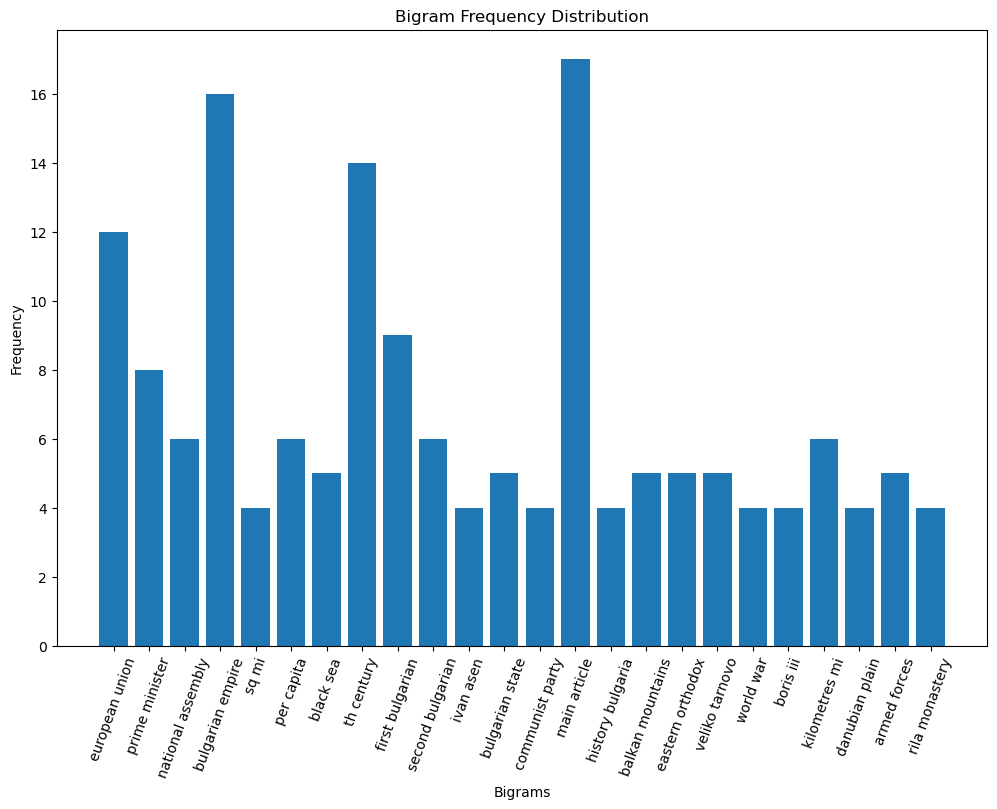

In [154]:
# Creating the plot for the bigrams

plt.figure(figsize=(12,8))
plt.bar(bigram_labels, bigram_freq)
plt.xticks(rotation=70)
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.title("Bigram Frequency Distribution")
plt.show()

In [155]:
# Preparing the data for the bigrams

trigrams, trigram_freq = zip(*filtered_trigrams.items())
trigram_labels = [" ".join(trigram) for trigram in trigrams]

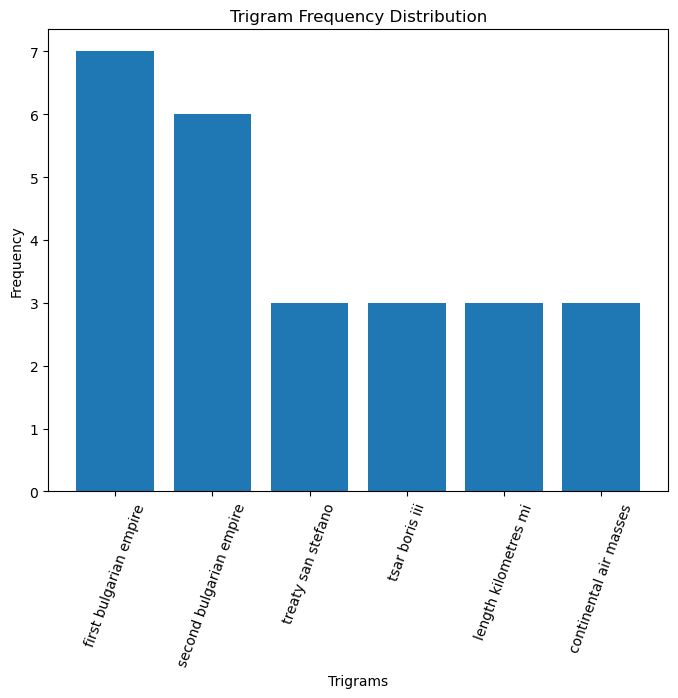

In [156]:
plt.figure(figsize=(8,6))
plt.bar(trigram_labels, trigram_freq)
plt.xticks(rotation=70)
plt.title("Trigram Frequency Distribution")
plt.xlabel("Trigrams")
plt.ylabel("Frequency")

plt.show()